In [1]:
import numpy as np
import mase
import pandas as pd
import mitten

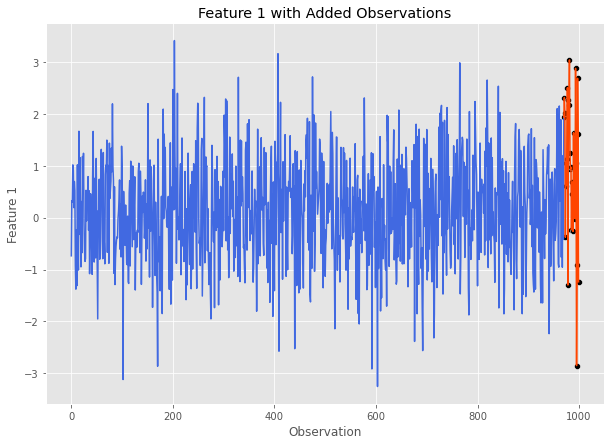

In [16]:
cov = np.eye(5)  # 5 independent features all with 0 mean
sim = mase.Simulation(1000, covariance_matrix=cov)  # 1000 observations
specs_df = pd.DataFrame()
specs_df['mean'] = [1, 0]
specs_df['sd'] = [1, 2]
specs_df['n_obs'] = [20, 10] # the last 30 are out of control
feature_index = 1
sim.add_gaussian_observations(specs_df, feature_index, visualize=True)

In [17]:
data = sim.get_data()
num_in_control = 1000-30

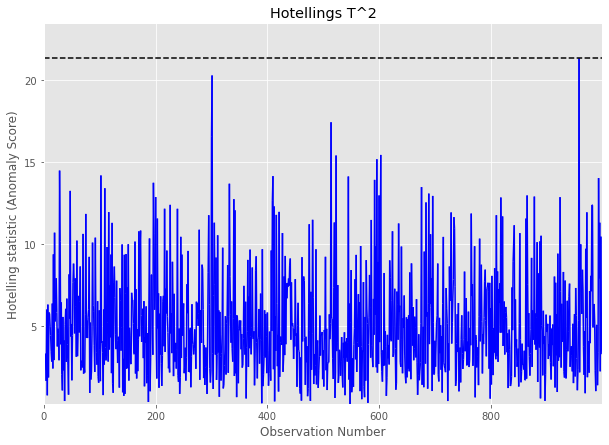

In [18]:
t2_stats, ucl = mitten.hotelling_t2(data, num_in_control, plotting=True)

In [19]:
t2_stats[:5], ucl # let's take a look at the calculated statistics and the plotted UCL

([3.61120046908911,
  2.3306052589695314,
  2.795051226210622,
  3.3354573439721458,
  1.6780616079575668],
 21.330053024532827)

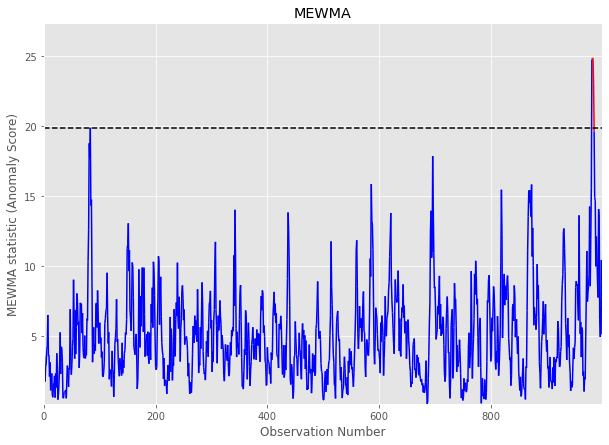

In [20]:
mewma_stats, ucl = mitten.apply_mewma(data, num_in_control, plotting=True)

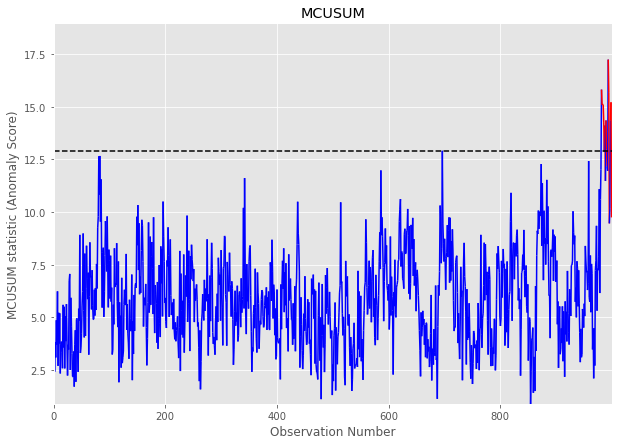

In [21]:
mcusum_stats, ucl = mitten.mcusum(data, num_in_control, 0.5, plotting=True)

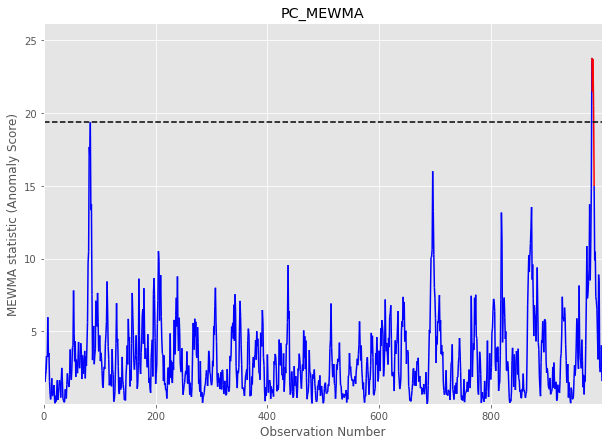

In [22]:
pc_mewma_stats, ucl = mitten.pc_mewma(data, num_in_control, 3, plotting=True)

In [23]:
mitten.interpret_multivariate_signal(data, pc_mewma_stats, ucl, verbose=True);

The most likely culprit features and average t-statistic ranking in decreasing order are:
1    1.50
2    2.50
0    3.00
4    3.75
3    4.25
dtype: float64
